<a href="https://colab.research.google.com/github/sravanreddy6745/Traffic-Sign-Classification/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TrafficSignClassification

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Loading the data as train, test & valadition.

In [3]:
#import train data
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/train.p', 'rb') as f:
    train_data = pickle.load(f)
    
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/test.p', 'rb') as f:
    test_data = pickle.load(f)
    


In [4]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [5]:
print("Training data  shape",X_train.shape)
print("Test data   shape",X_test.shape)
print("validation  data shpe",X_val.shape)

Training data  shape (34799, 32, 32, 3)
Test data   shape (12630, 32, 32, 3)
validation  data shpe (4410, 32, 32, 3)


# Visualising the data

(32, 32, 3)


8

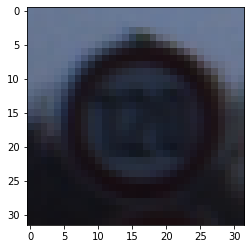

In [6]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
print(X_train[i].shape)
y_train[i]

In [7]:
data = pd.read_csv('signnames.csv')
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))


FileNotFoundError: ignored

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


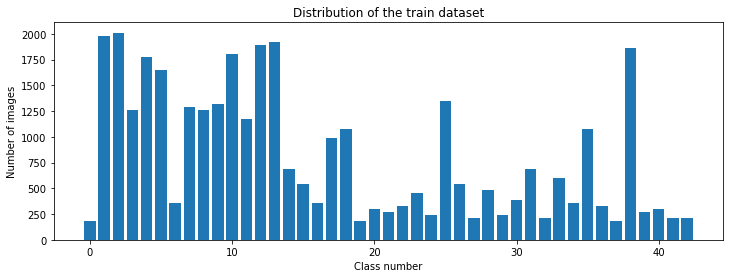

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



(34799, 32, 32, 3)


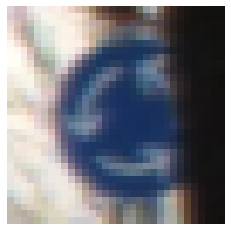

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


(32, 32, 3)
36


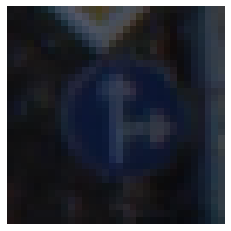

In [8]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])


In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img



(32, 32)


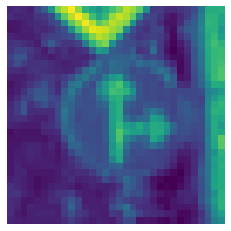

In [ ]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [ ]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img


(32, 32)


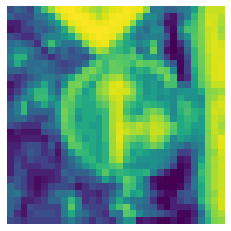

In [ ]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [9]:
def preprocess(img):
    #img = grayscale(img)
    #img = equalize(img)
    img = img/255
    return img


In [10]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))


(34799, 32, 32, 3)


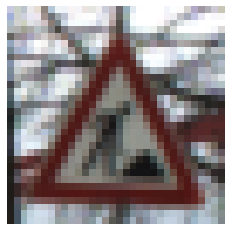

In [11]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


In [13]:
X_train = X_train.reshape(34799, 32, 32,3)
X_test = X_test.reshape(12630, 32, 32,3)
X_val = X_val.reshape(4410, 32, 32,3)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)


In [15]:
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)


(15, 32, 32, 3)


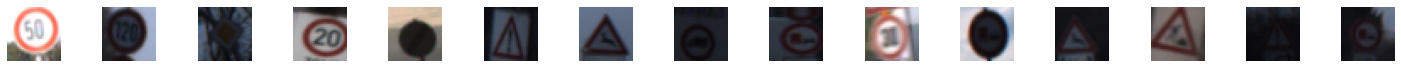

In [16]:
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32,3))
    axs[i].axis("off")
 
print(X_batch.shape)



In [17]:
from tensorflow.keras import utils as np_utils

In [18]:
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)
y_val = np_utils.to_categorical(y_val, 43)


# MODEL CREATION -LENET

In [23]:
def modified_model():
  model = Sequential()
  model.add(layers.Conv2D(60, (5, 5), input_shape=(32, 32, 3), activation='relu',padding='same'))
  model.add(layers.Conv2D(60, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(43, activation='softmax'))
  
  model.compile(keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [24]:
from keras.models import Sequential
from tensorflow.keras import layers,datasets,models

from tensorflow import keras
model=modified_model()

In [ ]:
from tensorflow.keras import layers,datasets,models


In [25]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 10s 5ms/step - loss: 0.8431 - accuracy: 0.7537 - val_loss: 0.3172 - val_accuracy: 0.9295
Epoch 2/10
2175/2175 [==============================] - 10s 4ms/step - loss: 0.1219 - accuracy: 0.9653 - val_loss: 0.1762 - val_accuracy: 0.9476
Epoch 3/10
2175/2175 [==============================] - 10s 5ms/step - loss: 0.0816 - accuracy: 0.9758 - val_loss: 0.3035 - val_accuracy: 0.9544
Epoch 4/10
2175/2175 [==============================] - 10s 5ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.2229 - val_accuracy: 0.9605
Epoch 5/10
2175/2175 [==============================] - 10s 5ms/step - loss: 0.0551 - accuracy: 0.9842 - val_loss: 0.2487 - val_accuracy: 0.9596
Epoch 6/10
2175/2175 [==============================] - 10s 4ms/step - loss: 0.0446 - accuracy: 0.9872 - val_loss: 0.1986 - val_accuracy: 0.9653
Epoch 7/10
2175/2175 [==============================] - 10s 4ms/step - loss: 0.0497 - accuracy: 0.9864 - val_loss: 0.2107 - val_ac

Text(0.5, 0, 'epoch')

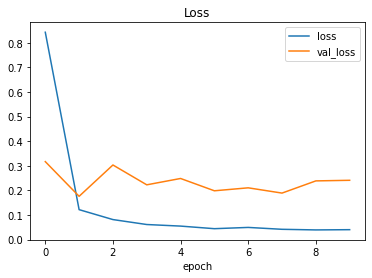

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


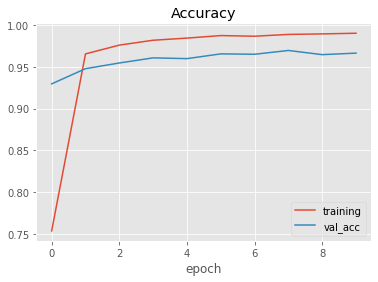

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.style.use('ggplot')


In [32]:
score=model.evaluate(X_test,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.9508


In [33]:
score

[0.3997039794921875, 0.9507521986961365]

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

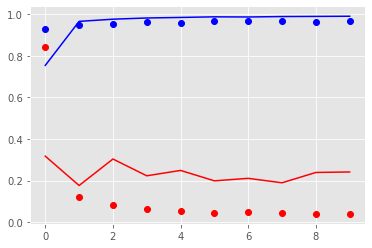

In [39]:
epochs=range(10)
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="validation Loss")
plt.plot(epochs, val_accuracy,'bo',label="validation accuracy")
plt.plot(epochs,accuracy,'b',label="accuracy")
plt.savefig('graph')

In [43]:
predicted_classes=model.predict_classes(X_test)
predicted_classes[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


16

In [47]:
y_true=y_test
y_true[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

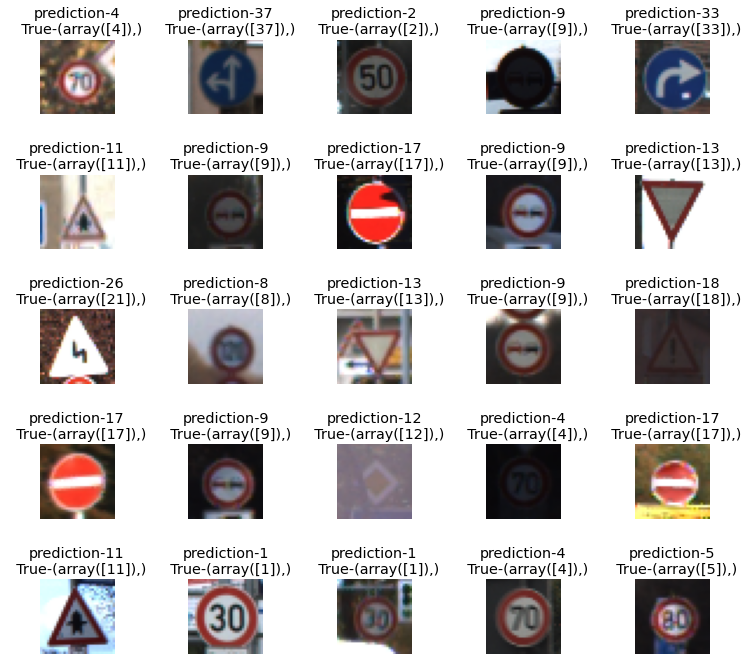

In [55]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
  index=random.randint(0,12630)
  axes[i].imshow(X_test[index])
  axes[i].set_title('prediction-{}\n  True-{}'.format(predicted_classes[index],np.where(y_true[index]==1)))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 60)        4560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 750)              